In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the cleaned dataset
data = pd.read_csv('training_data.csv')

In [6]:
# Select representative item
item_id = 'FOODS_1_001_CA_1'
item_data = data[data['item_id'] == item_id].copy()

# Convert date to datetime and sort
item_data['date'] = pd.to_datetime(item_data['date'])
item_data = item_data.sort_values('date').reset_index(drop=True)

# Aggregate by 3-month periods (quarterly)
item_data['year'] = item_data['date'].dt.year
item_data['quarter'] = item_data['date'].dt.quarter
quarterly_data = (
    item_data.groupby(['year', 'quarter'])
    .agg({'demand': 'sum', 'date': 'min'})
    .reset_index()
)
quarterly_data['period'] = quarterly_data['year'].astype(str) + 'Q' + quarterly_data['quarter'].astype(str)

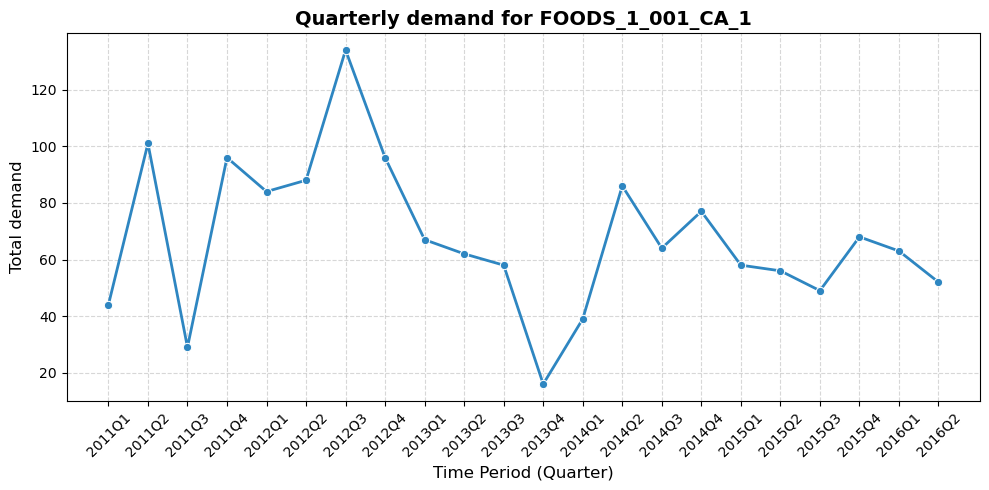

Total quarters: 22
demand range: 16 to 134
Mean quarterly demand: 67.59


In [8]:
# Create plot
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=quarterly_data,
    x='period',
    y='demand',
    marker='o',
    linewidth=2,
    markersize=6,
    color='#2E86C1'
)
plt.title(f'Quarterly demand for {item_id}', fontsize=14, fontweight='bold')
plt.xlabel('Time Period (Quarter)', fontsize=12)
plt.ylabel('Total demand', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save figure
plt.savefig('./images/quarterly_demand.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print(f"Total quarters: {len(quarterly_data)}")
print(f"demand range: {quarterly_data['demand'].min()} to {quarterly_data['demand'].max()}")
print(f"Mean quarterly demand: {quarterly_data['demand'].mean():.2f}")

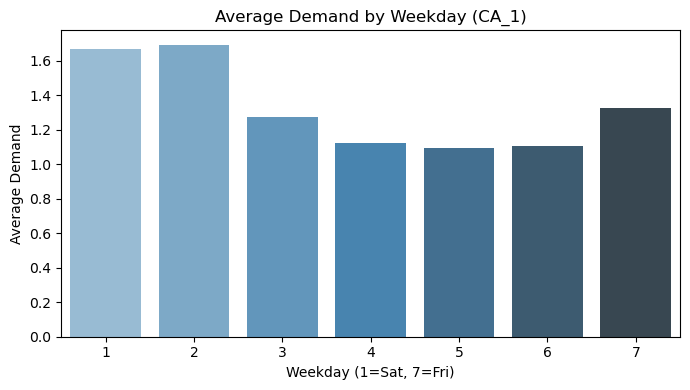

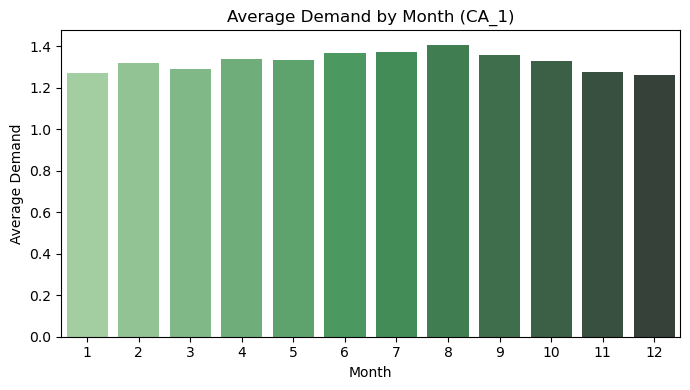

In [9]:
df = data.copy()

# Weekday pattern
weekday_avg = df.groupby("wday")["demand"].mean()

plt.figure(figsize=(7,4))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette="Blues_d")
plt.xlabel("Weekday (1=Sat, 7=Fri)")
plt.ylabel("Average Demand")
plt.title("Average Demand by Weekday (CA_1)")
plt.tight_layout()
plt.show()

# Month pattern
month_avg = df.groupby("month")["demand"].mean()

plt.figure(figsize=(7,4))
sns.barplot(x=month_avg.index, y=month_avg.values, palette="Greens_d")
plt.xlabel("Month")
plt.ylabel("Average Demand")
plt.title("Average Demand by Month (CA_1)")
plt.tight_layout()
plt.show()

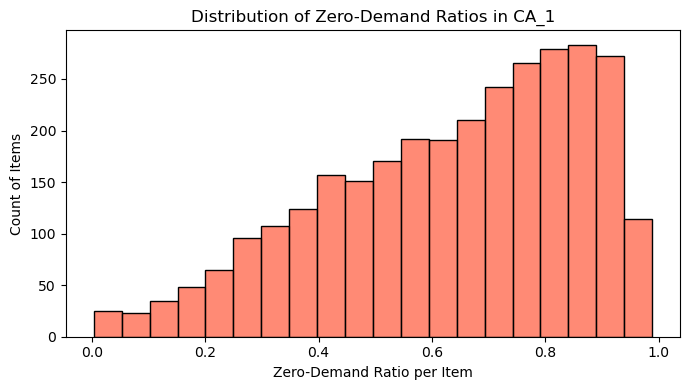

Median zero-demand ratio: 0.6795608991113434
Items with >80% zero demand: 903


In [10]:
zero_ratio = df.groupby("item_id")["demand"].apply(lambda x: (x==0).mean())

plt.figure(figsize=(7,4))
sns.histplot(zero_ratio, bins=20, kde=False, color="tomato")
plt.xlabel("Zero-Demand Ratio per Item")
plt.ylabel("Count of Items")
plt.title("Distribution of Zero-Demand Ratios in CA_1")
plt.tight_layout()
plt.show()

print("Median zero-demand ratio:", zero_ratio.median())
print("Items with >80% zero demand:", (zero_ratio > 0.8).sum())

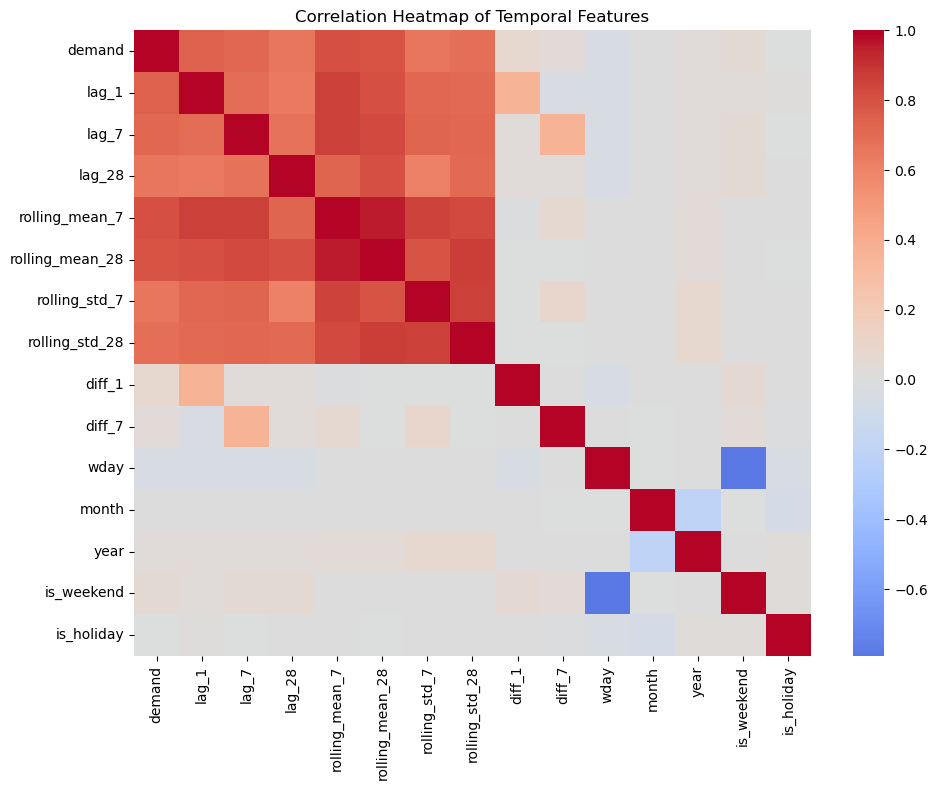

In [11]:
# Correlation heatmap for features vs demand
features = [
    "demand", "lag_1", "lag_7", "lag_28",
    "rolling_mean_7", "rolling_mean_28",
    "rolling_std_7", "rolling_std_28",
    "diff_1", "diff_7",
    "wday", "month", "year", "is_weekend", "is_holiday"
]

corr = df[features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Temporal Features")
plt.tight_layout()
plt.show()